In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

In [4]:
df = pd.read_csv('C:/Users/malak/source/repos/Sales-Customer-Behavior-Analysis/Preprocessing/Preprocessed dataset/Preprocessed Time Series Final.csv')

In [5]:
df.head()

,event_type,product_id,category_id,price,user_id,user_session,category_code_0,category_code_1,category_code_2,category_code_3,...,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11
0,1,1002532,2.053010e+18,0.937399,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,26204062,2.053010e+18,-0.188667,515547943,4737b7aa-83f7-4899-86e0-2d53b2ddbffc,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,4804055,2.053010e+18,-0.342339,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1307240,2.053010e+18,0.211381,520575653,9acd3cb7-79b7-4293-bb81-bec02a1c9cd3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1002524,2.053010e+18,0.578390,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
features = ['price'] + [f'category_code_{i}' for i in range(5)] + [f'brand_{i}' for i in range(12)]

In [7]:
 #Step 2: Prepare X and y
X = df[features].values  # shape (num_samples, num_features)
y = df['event_type'].values  # labels (strings)

In [8]:
# Step 5: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

In [10]:
log_reg.fit(X_train, y_train)

C:\Users\malak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [11]:
y_pred = log_reg.predict(X_test)

In [12]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report: precision, recall, f1-score per class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4322

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.76      0.53     66666
           1       0.38      0.09      0.15     66667
           2       0.49      0.44      0.46     66667

    accuracy                           0.43    200000
   macro avg       0.43      0.43      0.38    200000
weighted avg       0.43      0.43      0.38    200000



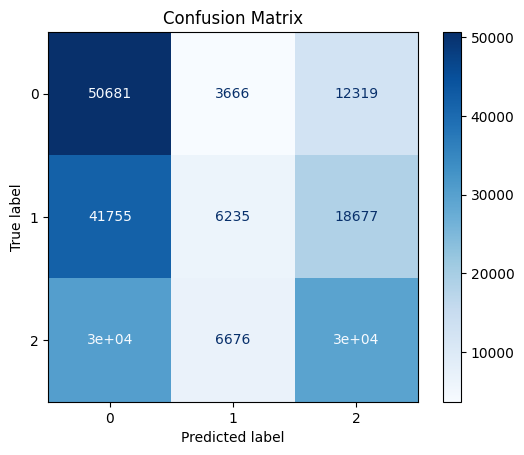

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [14]:
joblib.dump(log_reg, 'log_reg_model.pkl')
print("Model saved as log_reg_model.pkl")

Model saved as log_reg_model.pkl
